# Gradient Descent with Regression
## This notebook will take a quick review on linear Regrsseion calcualted using three methods (using python):
### 1- Starting with Batch Gradient Descent from scratch.
### 2- Moving to calculating thetas using the normal equation.
### 3- Last method using scikit-learn linear regression.


### Import numpy, matplotlib.pyplot, and sklearn

In [1]:
#import numpy and name it np as always
import numpy as np

#import only needed method and classes from sklearn
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#import matplotlib for visualization
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


### Let's start with creating data set
To have a dataset or set of data points, the student must generate a pair of arrays X and y with the values in X equally distributed between 0 and 20 and the values in y such that: yi = a*xi + b (and a = -2, b = 1)

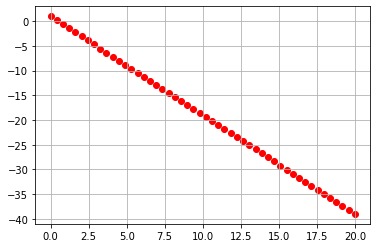

In [2]:
a = -2
b = 1
X_data = np.linspace(0,20,50)
Y_data = a * X_data + b
plt.scatter(X_data,Y_data, c = 'r')
plt.grid()
plt.show()

## Gradient Descent Implementation

#### This function takes: 
                    x: 1-D data as input of GD, 
                    y: 1-D data as output of GD, 
                    alpha: learning rate, 
                    and epochs: loops over the whole data-set.

#### Calculate Gradient Descent then return :
                    theta_0: final values of theta 0 ,
                    theta_1: final values of theta 1 ,
                    theta_0_list: list of all values of theta 0,
                    theta_1_list: list of all values of theta 0, 
                    and cost_list: loss list over the epochs.

### Linear Regression equation using intersection as Theta 0, and slope as Theta 1. 
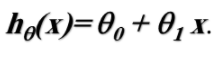

### Theta 0 and Theta 1 update:

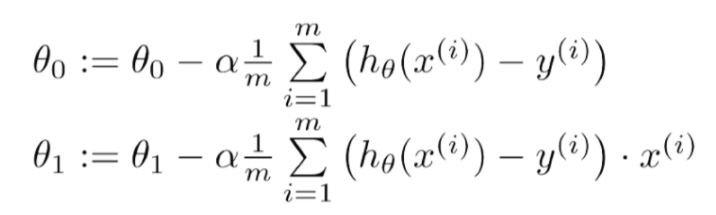

In [3]:
def GD_batch(x,y,alpha = 1e-3,epochs =  1000):
    '''This function takes:
                x: 1-D data as input of GD, 
                y: 1-D data as output of GD, 
                alpha: learning rate, 
                and epochs: loops over the whole data-set.
                
        Calculate Gradient Descent then return :
                theta_0: final values of theta 0 ,
                theta_1: final values of theta 1 ,
                theta_0_list: list of all values of theta 0,
                theta_1_list: list of all values of theta 0, 
                and cost_list: loss list over the epochs.'''
    
    
    theta_0 = theta_1 = 0
    
    m = len(x)
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    
    
    for i in range(epochs):
        y_hat_list = theta_0 + theta_1*x
        y_diff = y_hat_list - y
        temp_loss = np.sum(y_diff**2)
        loss = temp_loss/(2*m)
        
        cost_list.append(loss)
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        GD_0 = np.sum(y_diff)/m
        GD_1 = np.sum(y_diff * x)/m

        theta_0 = theta_0 - alpha * GD_0
        theta_1 = theta_1 - alpha * GD_1
        
    return(theta_0,theta_1,theta_0_list,theta_1_list,cost_list)           

In [4]:
theta_0,theta_1,theta_0_list,theta_1_list,cost_list = GD_batch(X_data,Y_data,alpha = 1e-2,epochs =  400)

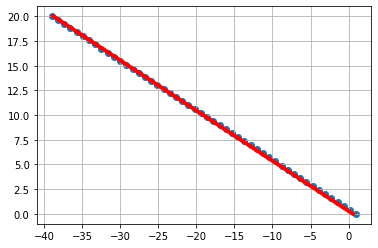

In [5]:
Y_new = theta_0 + theta_1 * X_data

plt.scatter(Y_data,X_data)
plt.plot(Y_new,X_data, c='r', lw = 4)
plt.grid()
plt.show()

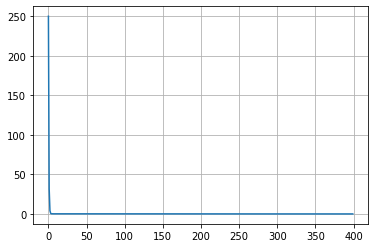

In [6]:
plt.plot(cost_list)
plt.grid()
plt.show()

In [7]:
print(f"Mean squared error:{ mean_squared_error(Y_data, Y_new)}")
print(f"R2 Score:{r2_score(Y_data, Y_new)}")


Mean squared error:0.04319610984360314
R2 Score:0.9996887339143623


# 2- Calculating thetas using the normal equation:

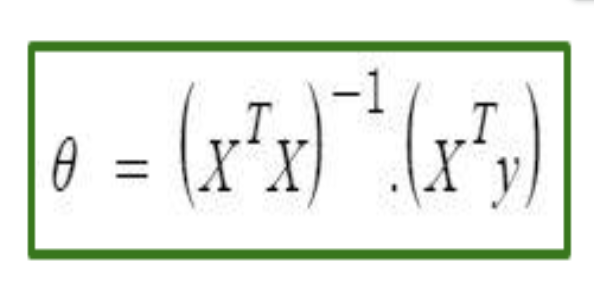

Create a dataset from sklearn made for regression without noise, 100 samples and only 1 feature.
Then visualize these data.

In [8]:
x_data , y_data = make_regression(n_samples=100, n_features=1, noise=0.0, shuffle=True,n_informative = 1, bias= 1)
# x_data
#visualize the data to know the distribution
# plt.scatter(x_data,y_data)
# plt.grid()
# plt.show()

#### Before claculating the thetas vector from the normal equation.
       Fisrt the X data array need to be adjusted and add column of X0 =1 to calculate theta 0.
       Theta 0 is needed if the data is shifted along with y axis.

In [9]:
x_GD = np.concatenate((np.ones(len(x_data)).reshape(-1,1),x_data),axis = 1)
# x_GD = x_data
#using the normal equation to get thetas values  
thetas = np.linalg.inv(x_GD.T @ x_GD) @(x_GD.T @y_data)
# print(thetas)
#theta 0 and theta 1 values
theta_normal_0 ,theta_normal_1 = thetas[0],thetas[1]

### Plot The output and compare it to the real data set distribution.

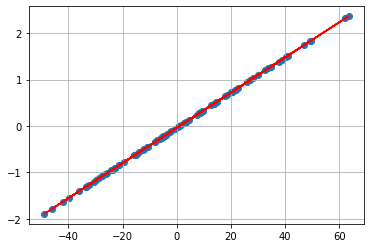

In [10]:
#claculate y_new using the output from  thetas list
y_new = x_data * thetas[1] + thetas[0]

#regression line plot in red
plt.plot(y_new,x_data, c= 'r')
plt.grid()

#data-set in blue color as scatter 
plt.scatter(y_data,x_data)
plt.show()

In [11]:
print(f"Mean squared error:{ mean_squared_error(Y_data, Y_new)}")
print(f"R2 Score:{r2_score(Y_data, Y_new)}")


Mean squared error:0.04319610984360314
R2 Score:0.9996887339143623


# 3- Use bulit-in method in sklearn 

split the data into train data and test data using train_test_split() a buli-in function in sklearn

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,  shuffle=True)

In [13]:
reg = LinearRegression(copy_X=True).fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f' Regression score = {reg.score(X_test, y_pred)}\n Theta 1  = {reg.coef_}\n Theta 0  =  {reg.intercept_}')

 Regression score = 1.0
 Theta 1  = [26.37630263]
 Theta 0  =  1.0000000000000004


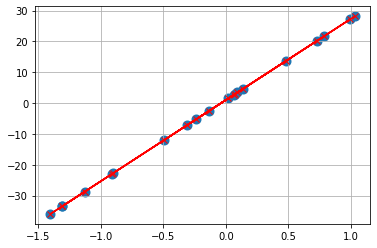

In [14]:
y_pred = reg.predict(X_test)
plt.plot(X_test,y_pred, c= 'r', marker = 'x')
plt.grid()
plt.scatter(X_test,y_test, marker='o', lw = 4)

In [15]:
print(f"Mean squared error:{ mean_squared_error(Y_data, Y_new)}")
print(f"R2 Score:{r2_score(Y_data, Y_new)}")


Mean squared error:0.04319610984360314
R2 Score:0.9996887339143623


In [16]:
print(f'Theta 0 from Normal Equation = {theta_normal_0}\n, Theta 0 from sklearn linear regression = {reg.intercept_}')
print(f'\nTheta 1 from Normal Equation = {theta_normal_1}\n, Theta 1 from sklearn linear regression = {float(reg.coef_)}')

Theta 0 from Normal Equation = 0.9999999999999997
, Theta 0 from sklearn linear regression = 1.0000000000000004

Theta 1 from Normal Equation = 26.376302626434402
, Theta 1 from sklearn linear regression = 26.376302626434388


# Bouns Data visualization

## 2-D representation:

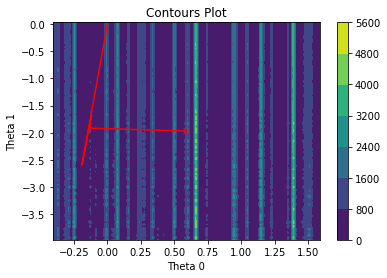

In [20]:
#gnerate 100 sample equvlant to sample size
xlist = np.linspace(theta_0 - 1, theta_0 + 1, 100 )
ylist = np.linspace(theta_1 - 2, theta_1 + 2, 100 )

# make a meshgrid with every pair of xlist and ylist
X0, X1 = np.meshgrid(xlist, ylist)

#calculate values and its mean squared error
Y_pred = X0 +  X1 * x_data
mse = np.square(Y_pred - y_data)

# create a plot
fig,ax=plt.subplots(1,1)
#plot a contour plot
cp = ax.contourf(X0, X1, mse)
# plot the point of error values untill the minimum
ax.plot(theta_0_list,theta_1_list,markevery = [-1], marker= 'x',c = 'r')

# Add a colorbar, title and labels to the axises to a plot
fig.colorbar(cp) 
ax.set_title('Contours Plot')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')

plt.show()

## 3-D representation:

<IPython.core.display.Javascript object>


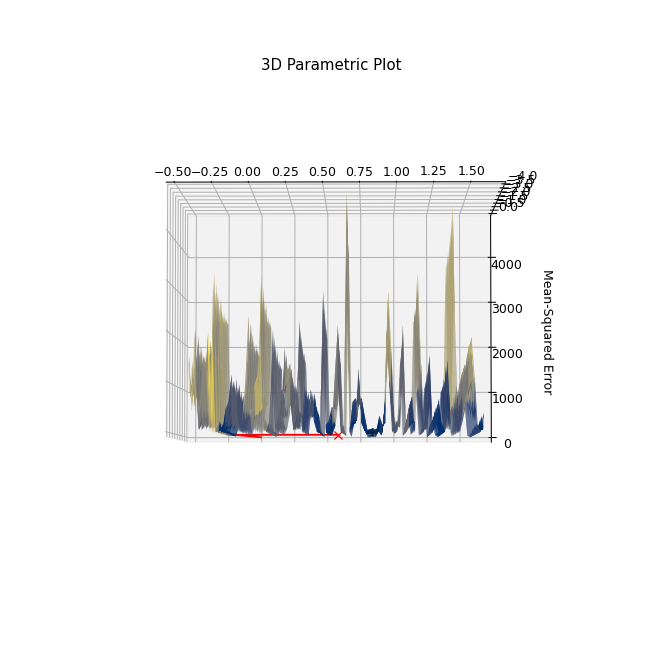

In [21]:
%matplotlib notebook
#adjust figure size and make it 3-d object
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
#create a surface
surf = ax.plot_surface(X0, X1, mse, cmap = plt.cm.cividis)
#plot a line with the values of error function
ax.plot(theta_0_list,theta_1_list, markevery = [-1],marker= 'x',c = 'r')

# Set axes title
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_zlabel('Mean-Squared Error', labelpad=20)

plt.show()